### Dataset Link:https://www.kaggle.com/bhavikbb/password-strength-classifier-dataset

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset=pd.read_csv("data.csv",error_bad_lines=False)

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

b'Skipping line 525174: expected 2 fields, saw 5\nSkipping line 526251: expected 2 fields, saw 5\nSkipping line 529611: expected 2 fields, saw 5\nSkipping line 531398: expected 2 fields, saw 5\nSkipping line 534146: expected 2 fields, saw 5\nSkipping line 544954: expected 2 fields, saw 5\nSkipping line 553002: expected 2 fields, saw 5\nSkipping line 553883: expected 2 fields, saw 5\nSkipping line 553887: expected 2 fields, saw 5\nSkipping line 553915: expected 2 fields, saw 5\nSkipping line 554172: expected 2 fields, saw 5\nSkipping line 563534: expected 2 fields, saw 5\nSkipping line 565191: expected 2 fields, saw 5\nSkipping line 574108: expected 2 fields, saw 5\nSkipping line 574412: expected 2 fields, saw 5\nSkipping line 575985: expected 2 fields, saw 5\nSkipping line 580091: expected 2 fields, saw 5\nSkipping line 582682: expected 2 fields, saw 5\nSkipping line 585885: expected 2 fields, saw 5\nSkipping line 590171: expected 2 fields, saw 5\nSkipping line 591924: expected 2 field

In [3]:
##Lets check the head of our data
dataset.head()

password  strength
0     kzde5577         1
1     kino3434         1
2    visi7k1yr         1
3     megzy123         1
4  lamborghin1         1

In [4]:
##Lets check the shape of data
dataset.shape

(669640, 2)

In [5]:
##Checking the unique values in strength
dataset["strength"].unique()

array([1, 2, 0])

### There are only 3 classes in strength
### 0->Password is weak
### 1->Normal password
### 2->Strong password

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669640 entries, 0 to 669639
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669639 non-null  object
 1   strength  669640 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 10.2+ MB


In [7]:
##Lets see if there are any null values in dataset
dataset.isnull().sum()

password    1
strength    0
dtype: int64

There is 1 null value in password

In [8]:
##Lets check the record where our value is null
dataset[dataset["password"].isnull()]

password  strength
367579      NaN         0

As there is only 1 record we can drop our nan values

In [9]:
dataset.dropna(inplace=True)

<AxesSubplot:xlabel='strength', ylabel='count'>

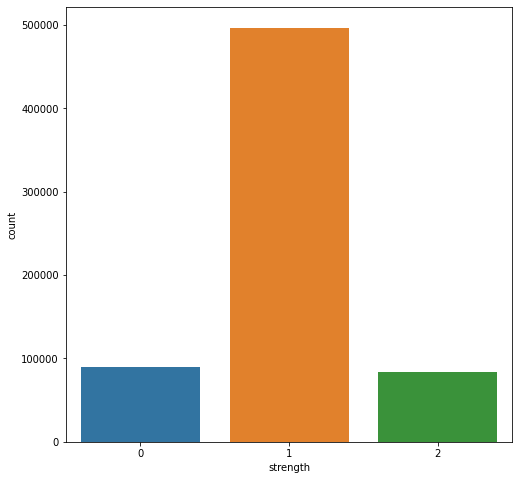

In [10]:
plt.figure(figsize=(8,8))
sns.countplot(dataset.strength)

As we can see count of class 1 is every high compared to class 0 and class 2

In [11]:
##I'll convert my data to array
password_=np.array(dataset)
password_

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [12]:
type(password_)

numpy.ndarray

In [13]:
password_[0]

array(['kzde5577', 1], dtype=object)

In [14]:
##Extracting the password from data
password_[0][0]

'kzde5577'

In [17]:
import random
random.shuffle(password_)

In [18]:
password_

array([['kzde5577', 1],
       ['kzde5577', 1],
       ['kzde5577', 1],
       ...,
       ['baligod02', 1],
       ['ygapwutkj489', 1],
       ['meriemassou15', 1]], dtype=object)

In [19]:
##Create my dependant and independant feature
X=[passwords[0] for passwords in password_]
y=[passwords[1] for passwords in password_]

In [20]:
##Lets check passwords
X

['kzde5577',
 'kzde5577',
 'kzde5577',
 'kzde5577',
 'kzde5577',
 'megzy123',
 'visi7k1yr',
 'megzy123',
 'visi7k1yr',
 'kino3434',
 'megzy123',
 'megzy123',
 'u6c8vhow',
 'lamborghin1',
 'u6c8vhow',
 'megzy123',
 'lamborghin1',
 'megzy123',
 'lamborghin1',
 'u6c8vhow',
 'megzy123',
 'kzde5577',
 'jytifok873',
 'megzy123',
 'visi7k1yr',
 'visi7k1yr',
 'WUt9IZzE0OQ7PkNE',
 'megzy123',
 'lamborghin1',
 'visi7k1yr',
 'lamborghin1',
 'megzy123',
 'megzy123',
 'asv5o9yu',
 'lamborghin1',
 'megzy123',
 'prisonbreak1',
 'visi7k1yr',
 '612035180tok',
 '612035180tok',
 'kzde5577',
 'asv5o9yu',
 'cigicigi123',
 'cigicigi123',
 'visi7k1yr',
 'sbl571017',
 'fk9qi21m',
 'as326159',
 'universe2908',
 '6975038lp',
 'prisonbreak1',
 'u6c8vhow',
 'as326159',
 'visi7k1yr',
 'visi7k1yr',
 'jytifok873',
 'WUt9IZzE0OQ7PkNE',
 'visi7k1yr',
 'sbl571017',
 'as326159',
 'as326159',
 'sbl571017',
 'jerusalem393',
 '0169395484a',
 'sbl571017',
 'jytifok873',
 'lamborghin1',
 'klara-tershina3H',
 'visi7k1yr',
 'a

In [21]:
type(X)

list

In [22]:
##Convert words into characters
def make_chars(inputs):
    characters=[]
    for letter in inputs:
        characters.append(letter)
    return characters

In [23]:
make_chars("Vibhav")

['V', 'i', 'b', 'h', 'a', 'v']

In [24]:
vectorizer=TfidfVectorizer(tokenizer=make_chars)

In [25]:
X_=vectorizer.fit_transform(X)

In [26]:
X_.shape

(669639, 110)

In [27]:
vectorizer.get_feature_names()

['\x05',
 '\x08',
 '\x17',
 '\x19',
 '\x1b',
 '\x1c',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 '*',
 '+',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\x7f',
 '\x8d',
 '¡',
 '«',
 '°',
 '±',
 '²',
 '³',
 '´',
 'µ',
 '¶',
 '·',
 '¹',
 'º',
 '¾',
 '¿',
 'ß',
 'à',
 'á',
 'â',
 'ä',
 'å',
 'ç',
 'ê',
 'í',
 'ð',
 'ò',
 'ó',
 'ô',
 'õ',
 '÷',
 'ù',
 'ú',
 'ü',
 'ý',
 'þ',
 'ÿ',
 '‚']

In [28]:
X_[0]

<1x110 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [30]:
first_=X_[0].T.todense()

In [33]:
vec=pd.DataFrame(first_,index=vectorizer.get_feature_names(),columns=['tfidf'])

In [34]:
vec

tfidf
     0.0
     0.0
     0.0
     0.0
     0.0
..    ...
ü     0.0
ý     0.0
þ     0.0
ÿ     0.0
‚     0.0

[110 rows x 1 columns]

In [35]:
vec.sort_values(by=['tfidf'],ascending=False)

tfidf
7   0.592341
5   0.566258
z   0.335973
k   0.291184
d   0.286524
..       ...
?   0.000000
>   0.000000
=   0.000000
<   0.000000
‚   0.000000

[110 rows x 1 columns]

In [36]:

x_train,x_test,y_train,y_test=train_test_split(X_,y,test_size=0.27,random_state=42)

In [37]:
x_train.shape,x_test.shape

((488836, 110), (180803, 110))

In [38]:
#Model
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score 

In [39]:
classifier=[]
classifier.append(LogisticRegression(multi_class='ovr',n_jobs=-1))
classifier.append(LogisticRegression(multi_class='multinomial',solver='newton-cg',n_jobs=-1))
classifier.append(xgb.XGBClassifier(n_jobs=-1))
classifier.append(MultinomialNB())

In [40]:
classifier

[LogisticRegression(multi_class='ovr', n_jobs=-1),
 LogisticRegression(multi_class='multinomial', n_jobs=-1, solver='newton-cg'),
 XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
               colsample_bynode=None, colsample_bytree=None, gamma=None,
               gpu_id=None, importance_type='gain', interaction_constraints=None,
               learning_rate=None, max_delta_step=None, max_depth=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=-1, num_parallel_tree=None,
               random_state=None, reg_alpha=None, reg_lambda=None,
               scale_pos_weight=None, subsample=None, tree_method=None,
               validate_parameters=None, verbosity=None),
 MultinomialNB()]

In [41]:
result=[]
for model in classifier:
    a=model.fit(x_train,y_train)
    result.append(a.score(x_test,y_test))

[23:42:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [42]:
result1=pd.DataFrame({'score':result,
                      'algorithms':['logistic_regr_ovr',
                                    'logistic_regr_mutinomial',
                                    'xgboost','naive bayes']})

In [43]:
result1

score                algorithms
0  0.812171         logistic_regr_ovr
1  0.818941  logistic_regr_mutinomial
2  0.990039                   xgboost
3  0.742908               naive bayes

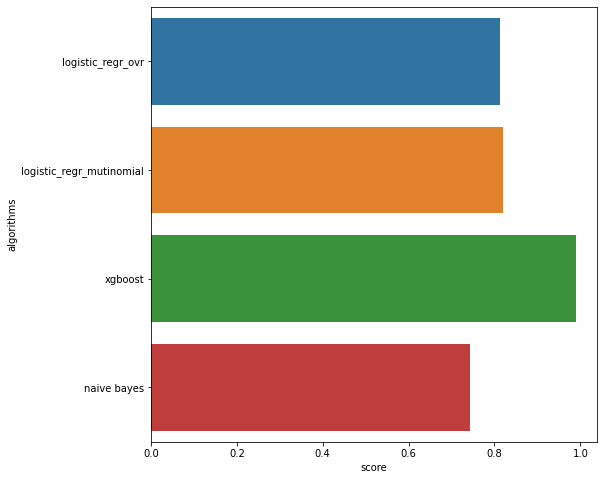

In [44]:
plt.figure(figsize=(8,8))
a=sns.barplot('score','algorithms',data=result1)
a.set_label('accuracy')

As we can see that XGBoost performs good for that given data 

In [45]:
xgb_classifier=xgb.XGBClassifier(n_jobs=-1)

In [46]:
xgb_classifier.fit(x_train,y_train)

[23:47:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [47]:
pred=xgb_classifier.predict(x_test)

In [48]:
from sklearn.metrics import confusion_matrix,classification_report

In [49]:
confusion_matrix(y_test,pred)

array([[ 23829,    781,      0],
       [   637, 133256,    112],
       [     4,    267,  21917]])

In [51]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     24610
           1       0.99      0.99      0.99    134005
           2       0.99      0.99      0.99     22188

    accuracy                           0.99    180803
   macro avg       0.99      0.98      0.99    180803
weighted avg       0.99      0.99      0.99    180803



In [ ]:
# import dill
# model_file=open("xgb_classifier.pkl","wb")
# dill.dump(xgb_classifier,model_file)
# model_file.close()

In [ ]:
# dill.dump(vectorizer, open("vectorizer.pkl", "wb"))

In [56]:
password="abc123@ABC"

In [57]:
password=vectorizer.transform([password])

In [58]:
xgb_classifier.predict(password)

array([1])

In [60]:
a=xgb_classifier.predict_proba(password)

In [61]:
a

array([[0.00857309, 0.90893614, 0.08249082]], dtype=float32)

In [63]:
a[0][1]

0.90893614